### Install Libraries:

In [1]:
!pip install -q --upgrade peft diffusers transformers accelerate protobuf scipy safetensors

import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

print("✅ Libraries installed & Dependencies fixed. Ready to paint!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 11.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 63.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 67.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 56.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.2/507.2 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 79.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta

2025-12-14 01:18:20.174259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765675100.534208      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765675100.679450      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


✅ Libraries installed & Dependencies fixed. Ready to paint!


### The "Prompt Engineer"

In [27]:
tokenizer = GPT2Tokenizer.from_pretrained("Gustavosta/MagicPrompt-Stable-Diffusion")
prompt_model = GPT2LMHeadModel.from_pretrained("Gustavosta/MagicPrompt-Stable-Diffusion", torch_dtype=torch.float16).to("cuda")

def enhance_prompt(starting_text):
    input_ids = tokenizer.encode(starting_text, return_tensors='pt').to("cuda")
    output = prompt_model.generate(
        input_ids,
        max_length=100,
        num_beams=2,
        temperature=0.9,
        top_k=50,
        early_stopping=True
    )
    
    enhanced_prompt = tokenizer.decode(output[0], skip_special_tokens=True)
    return enhanced_prompt.split(".")[0] + "."

simple = "goku eating shawarma"
complex_prompt = enhance_prompt(simple)
print(f"🔹 Input:  {simple}")
print(f"✨ Output: {complex_prompt}")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🔹 Input:  goku eating shawarma
✨ Output: goku eating shawarma, cinematic lighting, highly detailed, concept art, art by wlop and artgerm
.


### The "Painter" (Stable Diffusion 1.5)

In [28]:
# 🛑 Restart Session if you still have the old model loaded to clear RAM
# Then run imports (Cell 1 & 2) as normal.

from diffusers import DiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Load SDXL (The Big Boy)
model_id = "stabilityai/stable-diffusion-xl-base-1.0"

print(f"⏳ Loading {model_id} (This is 6GB+ so it takes 2-3 mins)...")

pipe = DiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")

# Memory Optimization (Crucial for Kaggle)
pipe.enable_attention_slicing()

# 🔓 Unlock the safety checker (Optional, same as before)
def dummy_checker(images, **kwargs): return images, [False] * len(images)
pipe.safety_checker = dummy_checker

print("✅ SDXL Ready! This model is 3x smarter than the last one.")

⏳ Loading stabilityai/stable-diffusion-xl-base-1.0 (This is 6GB+ so it takes 2-3 mins)...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

✅ SDXL Ready! This model is 3x smarter than the last one.


### Unlock the Safety Checker

In [24]:
def dummy_safety_checker(images, clip_input): return images, [False] * len(images)
pipe.safety_checker = dummy_safety_checker
print("🔓 Safety checker disabled. You can run your dream again!")

🔓 Safety checker disabled. You can run your dream again!


### The Dream Generator Function

🎨 Painting HD Dream: 'goku eating shawarma, cinematic lighting, highly detailed, concept art, art by wlop and artgerm
.'


  0%|          | 0/40 [00:00<?, ?it/s]

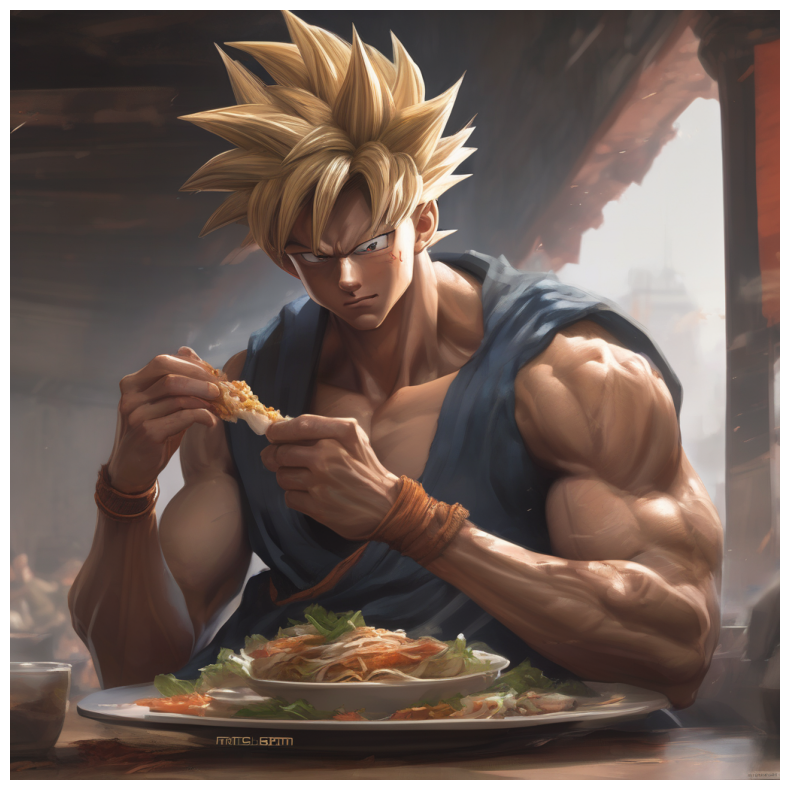

In [29]:
def visualize_dream_xl(prompt, save_name="dream_xl.png"):
    print(f"🎨 Painting HD Dream: '{prompt}'")
    
    # SDXL creates 1024x1024 images natively
    image = pipe(prompt, num_inference_steps=40).images[0]
    
    image.save(save_name)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Try the Trump prompt again
visualize_dream_xl(
   complex_prompt, 
    "trump_xl.png"
)